<h2><center> Topic Modeling on Humanitarian Operations

This notebook shows how to perform topic modeling on a collection of research papers related to humanitarian operations. The objective is to uncover latent topics present in the documents, which can help to better understand trends, themes, and areas of focus within humanitarian operations research.

We will compare Latent Dirichlet Allocation (LDA) and Latent Semantic Analysis (LSA) for topic modeling. The following steps will cover loading the dataset, descriptive statistics for the dataset, preprocessing the text corpus, generating topics using LDA vs LSA, performance evaluation of each model and parameters, time series evaluation of the topics and visualizing the results.

Key Steps:

1. Data collection (Through Web of Science and Scopus)
2. Data loading
3. Data description
4. Preprocessing
5. Topic Modeling using LDA/LSA
6. Metrics
7. Time evaluation
8. Topic visualization

---

Make sure to install the following libraries if it's the first time you are using them, with the commands "pip install". E.g.<code>pip intall pandas</code>

* <code>pandas</code>: For data manipulation and handling the dataset of papers.
* <code>nltk</code>: For natural language preprocessing, including tokenization, stop-word removal, and lemmatization.
* <code>gensim</code>: For topic modeling using Latent Dirichlet Allocation (LDA).
* <code>matplotlib/seaborn</code>: For visualizing the topics and their distribution across documents.

---

<h3>1. Data collection

SEARCH QUERY:
((disaster OR relief OR humanita*) AND (logistic OR supply AND chain OR operati* OR respons* OR prepare* OR mitigat* OR recover*))

<h3>2. Data loading and text processing

<h3> 2.1. Data loading

In [1]:
# Main libraries for this step, make sure to use the most updated versions
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In this case, the dataset is composed by abstracts from Web of Science and Scopus. Each dataset has its own particularities, that will be explained in the following steps.

<h4>Web of Science

In [2]:
# Depending on your dataset(s) and number of files, you will need to read them in this section. 
# Make sure to check the file type beforehand, pandas library offers a range of functions to read different CSV, JSON, XLSX,...
# Web of Science only allows to download 1000 abstracts per query, therefore this step will join all the records in just one dataset.
w1 = pd.read_excel('savedrecs (1).xls')
w2 = pd.read_excel('savedrecs (2).xls')
w3 = pd.read_excel('savedrecs (3).xls')
w4 = pd.read_excel('savedrecs (4).xls')
w5 = pd.read_excel('savedrecs (5).xls')
w6 = pd.read_excel('savedrecs (6).xls')
w7 = pd.read_excel('savedrecs (7).xls')
w8 = pd.read_excel('savedrecs (8).xls')
w9 = pd.read_excel('savedrecs (9).xls')
w10 = pd.read_excel('savedrecs (10).xls')
w11 = pd.read_excel('savedrecs (11).xls')
w12 = pd.read_excel('savedrecs (12).xls')
w13 = pd.read_excel('savedrecs (13).xls')
w14 = pd.read_excel('savedrecs (14).xls')
w15 = pd.read_excel('savedrecs (15).xls')
w16 = pd.read_excel('savedrecs (16).xls')
w17 = pd.read_excel('savedrecs (17).xls')
w18 = pd.read_excel('savedrecs (18).xls')
w19 = pd.read_excel('savedrecs (19).xls')
w20 = pd.read_excel('savedrecs (20).xls')
w21 = pd.read_excel('savedrecs (21).xls')
w22 = pd.read_excel('savedrecs (22).xls')
w23 = pd.read_excel('savedrecs (23).xls')
w24 = pd.read_excel('savedrecs (24).xls')
w25 = pd.read_excel('savedrecs (25).xls')
w26 = pd.read_excel('savedrecs (26).xls')
w27 = pd.read_excel('savedrecs (27).xls')
w28 = pd.read_excel('savedrecs (28).xls')
w29 = pd.read_excel('savedrecs (29).xls')
w30 = pd.read_excel('savedrecs (30).xls')
w31 = pd.read_excel('savedrecs (31).xls')

In [3]:
# A list is created with all the read files
list_wos = [w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, w12, w13, w14, w15, w16, w17, w18, w19, w20, w21, w22, w23, w24, w25,w26, w27, w28, w29, w30, w31]  # List of the dataframes
# These are concatenated in just one only variable
data_wos = pd.concat(list_wos)

In [4]:
# Number of raw records in Web of Science (considering blanks/missing values)
len(data_wos)

30369

In [5]:
# Metadata in Web of Science records, not necessarily all columns have values
data_wos.columns

Index(['Publication Type', 'Authors', 'Book Authors', 'Book Editors',
       'Book Group Authors', 'Author Full Names', 'Book Author Full Names',
       'Group Authors', 'Article Title', 'Source Title', 'Book Series Title',
       'Book Series Subtitle', 'Language', 'Document Type', 'Conference Title',
       'Conference Date', 'Conference Location', 'Conference Sponsor',
       'Conference Host', 'Author Keywords', 'Keywords Plus', 'Abstract',
       'Addresses', 'Affiliations', 'Reprint Addresses', 'Email Addresses',
       'Researcher Ids', 'ORCIDs', 'Funding Orgs', 'Funding Name Preferred',
       'Funding Text', 'Cited References', 'Cited Reference Count',
       'Times Cited, WoS Core', 'Times Cited, All Databases',
       '180 Day Usage Count', 'Since 2013 Usage Count', 'Publisher',
       'Publisher City', 'Publisher Address', 'ISSN', 'eISSN', 'ISBN',
       'Journal Abbreviation', 'Journal ISO Abbreviation', 'Publication Date',
       'Publication Year', 'Volume', 'Issue', 'Pa

In [6]:
# Selection of relevant features from the dataset and renaming column names for standardization
df_wos = pd.DataFrame()
df_wos['DOI'] = data_wos['DOI']
df_wos['Article_Title'] = data_wos['Article Title']
df_wos['Abstract'] = data_wos['Abstract']
df_wos['Author_Keywords'] = data_wos['Author Keywords']
df_wos['Author_Full_Names'] = data_wos['Author Full Names']
df_wos['Source_Title'] = data_wos['Source Title']
df_wos['Publication_Year'] = data_wos['Publication Year']
df_wos['DB'] = 'Web of Science' 

In [7]:
# Example of the first records in the Web of Science dataset
df_wos.head()

,DOI,Article_Title,Abstract,Author_Keywords,Author_Full_Names,Source_Title,Publication_Year,DB
0,10.1111/j.1745-493X.2012.03267.x,Humanitarian and Disaster Relief Supply Chains...,With an increasing number of disasters disrupt...,humanitarian; disaster; relief planning; respo...,"Day, Jamison M.; Melnyk, Steven A.; Larson, Pa...",JOURNAL OF SUPPLY CHAIN MANAGEMENT,2012,Web of Science
1,10.1111/j.0000-0000.2012.01047.x,Disaster-Relief Logistics With Limited Fuel Su...,Disaster-relief logistics consists of providin...,disaster-relief logistics; vehicle routing; fu...,"Suzuki, Yoshinori",JOURNAL OF BUSINESS LOGISTICS,2012,Web of Science
2,10.1016/j.ijdrr.2017.10.005,Integrated blood supply chain planning for dis...,This paper proposes a multi-objective mixed in...,Blood supply chain; Disaster relief; Multi-obj...,"Samani, Mohammad Reza Ghatreh; Torabi, S. Ali;...",INTERNATIONAL JOURNAL OF DISASTER RISK REDUCTION,2018,Web of Science
3,10.1057/palgrave.jors.2602125,Blackett Memorial Lecture - Humanitarian aid l...,This paper builds on the idea that private sec...,emergency relief operations; humanitarian logi...,"Van Wassenhove, LN",JOURNAL OF THE OPERATIONAL RESEARCH SOCIETY,2006,Web of Science
4,10.1111/jbl.12362,Inherent and adaptive resilience of logistics ...,This study aims to investigate the sources of ...,adaptive resilience; disaster; food supply cha...,"Umar, Muhammad; Wilson, Mark M. J.",JOURNAL OF BUSINESS LOGISTICS,2024,Web of Science


In [8]:
# Drop blanks or missing values
df_wos = df_wos.dropna()

In [9]:
# Number of records and number of columns after dropping blanks/missing values
df_wos.shape

(24506, 8)

In [10]:
# Saving the Web of Science unified file without blank/missing values
df_wos.to_csv("wos.csv",index=False)

<h4> Scopus

In [11]:
#Scopus allows to download more records per query, in this case we only have one file that contains in total 7523 records.
data_scopus = pd.read_csv('scopus original.csv')

In [12]:
len(data_scopus)

7523

In [13]:
# Metadata in Scopus records
data_scopus.columns

Index(['Authors', 'Author full names', 'Author(s) ID', 'Title', 'Year',
       'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end',
       'Page count', 'Cited by', 'DOI', 'Link', 'Abstract', 'Author Keywords',
       'Index Keywords', 'Document Type', 'Publication Stage', 'Open Access',
       'Source', 'EID'],
      dtype='object')

In [14]:
# Selection of relevant features from the dataset and renaming column names for standardization
df_scopus = pd.DataFrame()
df_scopus['DOI'] = data_scopus['DOI']
df_scopus['Article_Title'] = data_scopus['Title']
df_scopus['Abstract'] = data_scopus['Abstract']
df_scopus['Author_Keywords'] = data_scopus['Author Keywords']
df_scopus['Author_Full_Names'] = data_scopus['Authors']
df_scopus['Source_Title'] = data_scopus['Source title']
df_scopus['Publication_Year'] = data_scopus['Year']
df_scopus['DB'] = 'Scopus'

In [15]:
# Number of records and number of columns before dropping blanks/missing values
df_scopus.shape

(7523, 8)

In [16]:
# Drop blanks or missing values
df_scopus = df_scopus.dropna()

In [17]:
# Number of records and number of columns after dropping blanks/missing values
df_scopus.shape

(5902, 8)

In [18]:
# Selecting and dropping records that aren't empty but have 'No abstract available'/'No author available' 
df_scopus = df_scopus.drop(df_scopus[df_scopus['Abstract'] == '[No abstract available]'].index) 
df_scopus = df_scopus.drop(df_scopus[df_scopus['Author_Full_Names'] == '[No author available]'].index) 

In [19]:
# Number of records and number of columns after dropping cases with specificified condition
df_scopus.shape

(5898, 8)

In [20]:
# Saving the Scopus unified file without blank/missing values
df_scopus.to_csv("scopus.csv",index=False)

---

<h4> Concatenating WoS with Scopus in one dataset

In [21]:
# This command allows to concatenate the Scopus and Web of Science datasets in one dataset
df_wos_scopus = pd.DataFrame()
df_wos_scopus = pd.concat([df_wos,df_scopus], ignore_index=True)

In [22]:
# Final raw number of records and columns (including duplicates within the datasets)
df_wos_scopus.shape

(30404, 8)

In [23]:
# This helps to find the duplicated records in the dataset
df_wos_scopus = df_wos_scopus.drop_duplicates()
df_wos_scopus.shape

(28814, 8)

In [24]:
# Formatting Author Keywords as string, for following text processing
df_wos_scopus['Author_Keywords'] = df_wos_scopus['Author_Keywords'].astype(str)
# After deleting some rows due to the condition above, we need to restart the count index
df_wos_scopus.reset_index(drop=True, inplace=True)
df_wos_scopus.shape

(28814, 8)

In [25]:
# To facilitate later processing, Article title, abstract and keywords are joined in a single dataset column
df_wos_scopus['Input'] = df_wos_scopus[['Article_Title', 'Abstract', 'Author_Keywords' ]].agg(' '.join, axis=1)

In [26]:
df_wos_scopus.columns

Index(['DOI', 'Article_Title', 'Abstract', 'Author_Keywords',
       'Author_Full_Names', 'Source_Title', 'Publication_Year', 'DB', 'Input'],
      dtype='object')

In [27]:
# Saving the unified file without duplicate values
df_wos_scopus.to_excel('df_wos_scopus_vf.xlsx',index=False)

<h3>3. Data description

Descriptive Statistics
Total documents: 28469
Oldest publication year: 1993
Most recent publication year: 2023
Average title length (words): 14.0
Average abstract length (words): 215.0
Average number of authors: 4.0
Databases present: {'Web of Science': 22573, 'Scopus': 5896}
Average number of keywords: 5.0
Average input length (words): 239.0
Top 10 Most Frequent Keywords:
disaster: 1005
resilience: 862
covid-19: 742
disasters: 677
humanitarian logistics: 538
disaster management: 437
mental health: 425
natural disasters: 417
climate change: 392
earthquake: 381


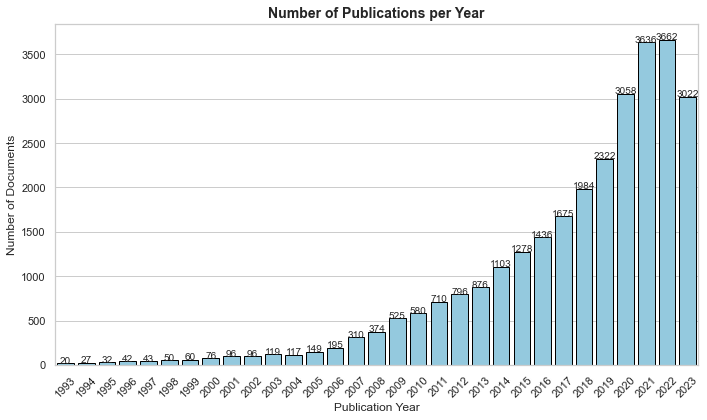

In [28]:
#Only considering publications until 2023
df_wos_scopus = df_wos_scopus[df_wos_scopus['Publication_Year'] <= 2023]

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["font.size"] = 12

stats = {}

# Total number of documents
stats['Total documents'] = len(df_wos_scopus)

# Publication year range
stats['Oldest publication year'] = df_wos_scopus['Publication_Year'].min()
stats['Most recent publication year'] = df_wos_scopus['Publication_Year'].max()

# Publications per year
pubs_per_year = df_wos_scopus['Publication_Year'].value_counts().sort_index()

# Title length (in words)
df_wos_scopus['Title_Length'] = df_wos_scopus['Article_Title'].fillna("").apply(lambda x: len(x.split()))
stats['Average title length (words)'] = round(df_wos_scopus['Title_Length'].mean(),0)

# Abstract length
df_wos_scopus['Abstract_Length'] = df_wos_scopus['Abstract'].fillna("").apply(lambda x: len(x.split()))
stats['Average abstract length (words)'] = round(df_wos_scopus['Abstract_Length'].mean(),0)

# Number of authors
df_wos_scopus['Num_Authors'] = df_wos_scopus['Author_Full_Names'].fillna("").apply(lambda x: len(x.split(";")))
stats['Average number of authors'] = round(df_wos_scopus['Num_Authors'].mean(),0)

# Database source distribution
stats['Databases present'] = df_wos_scopus['DB'].value_counts().to_dict()

# Number of keywords
df_wos_scopus['Num_Keywords'] = df_wos_scopus['Author_Keywords'].fillna("").apply(lambda x: len(x.split(";")))
stats['Average number of keywords'] = round(df_wos_scopus['Num_Keywords'].mean(),0)

# Input (Title, Abstract & Keywords) length
df_wos_scopus['Input_Length'] = df_wos_scopus['Input'].fillna("").apply(lambda x: len(x.split()))
stats['Average input length (words)'] = round(df_wos_scopus['Input_Length'].mean(),0)

# Top 10 most frequent keywords
all_keywords = ",".join(df_wos_scopus['Author_Keywords'].dropna()).lower().split(";")
keyword_freq = Counter([kw.strip() for kw in all_keywords if kw.strip()])
top_keywords = keyword_freq.most_common(10)

print("Descriptive Statistics")
for k, v in stats.items():
    print(f"{k}: {v}")

print("Top 10 Most Frequent Keywords:")
for kw, freq in top_keywords:
    print(f"{kw}: {freq}")

pubs_df = pubs_per_year.reset_index()
pubs_df.columns = ['Year', 'Count']
pubs_df = pubs_df.sort_values(by='Year')

sns.barplot(data=pubs_df, x='Year', y='Count', color='skyblue', edgecolor='black')

for i, row in pubs_df.iterrows():
    plt.text(x=i, y=row['Count'] + 0.5, s=int(row['Count']), ha='center', fontsize=10)

plt.title('Number of Publications per Year', fontsize=14, weight='bold')
plt.xlabel('Publication Year')
plt.ylabel('Number of Documents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("publications_by_year.png", dpi=300, bbox_inches='tight')
plt.show()

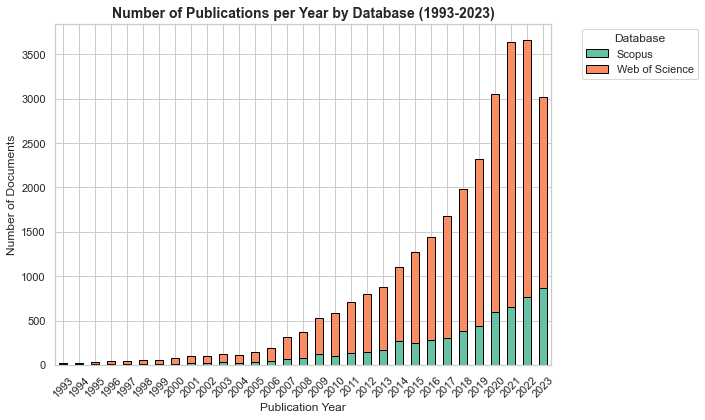

In [29]:
df_filtered = df_wos_scopus

# Count publications per year and per DB
db_year_counts = df_filtered.groupby(['Publication_Year', 'DB']).size().unstack(fill_value=0)

# Sort by year
db_year_counts = db_year_counts.sort_index()

# Plot using matplotlib for stacked bars
colors = sns.color_palette("Set2", n_colors=len(db_year_counts.columns))

ax = db_year_counts.plot(kind='bar', stacked=True, color=colors, edgecolor='black')

plt.title('Number of Publications per Year by Database (1993-2023)', fontsize=14, weight='bold')
plt.xlabel('Publication Year')
plt.ylabel('Number of Documents')
plt.xticks(rotation=45)
plt.legend(title='Database', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("publications_by_year_db.png", dpi=300, bbox_inches='tight')
plt.show()

---

<h3> 4. Text Preprocessing

In [30]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [31]:
# Given a string of text, rejects words with less than 3 characters, numbers, underscores, whitespace, quote marks, and other punctuation
def firstclean(texto):
    out = []
    texto = texto.lower()
    tokens =  re.findall(r'[a-zA-Z]+',texto)
    for w in tokens:
        if (len(w)>3):
            out.append(w)
    
    return " ".join(out)

In [32]:
%%time
# Application of the function in the Input column
df_wos_scopus['Cleaned_text'] = df_wos_scopus['Input'].apply(firstclean)

Wall time: 2.48 s


In [33]:
# This function lowercases, tokenizes in single words, removes non-alphabets and stopwords in all texts
stopwords = list(stopwords.words('english'))
# academic vocab 
#extras = ['humanitarian','relief', 'disaster', 'logistic', 'supply', 'chain', 'operations', 'response', 'preparedness', 'mitigation', 'recovery','abstract','research','paper','purpose', 'design', 'methodology', 'approach', 'findings', 'use', 'analysis', 'practical', 'result', 'problem', 'article', 'implications', 'originality', 'value', 'conclusion', 'method', 'result','study','aims','aim']
# join both lists
sw = stopwords

def preprocess(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]  # Remove non-alphabetic words
    tokens = [word for word in tokens if word not in sw]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

In [34]:
%%time
# Application of the function in the Input column
df_wos_scopus['Processed_text'] = df_wos_scopus['Cleaned_text'].apply(preprocess)

Wall time: 50.9 s


In [35]:
df_wos_scopus.columns

Index(['DOI', 'Article_Title', 'Abstract', 'Author_Keywords',
       'Author_Full_Names', 'Source_Title', 'Publication_Year', 'DB', 'Input',
       'Title_Length', 'Abstract_Length', 'Num_Authors', 'Num_Keywords',
       'Input_Length', 'Cleaned_text', 'Processed_text'],
      dtype='object')

In [36]:
df_wos_scopus.head(2)

,DOI,Article_Title,Abstract,Author_Keywords,Author_Full_Names,Source_Title,Publication_Year,DB,Input,Title_Length,Abstract_Length,Num_Authors,Num_Keywords,Input_Length,Cleaned_text,Processed_text
0,10.1111/j.1745-493X.2012.03267.x,Humanitarian and Disaster Relief Supply Chains...,With an increasing number of disasters disrupt...,humanitarian; disaster; relief planning; respo...,"Day, Jamison M.; Melnyk, Steven A.; Larson, Pa...",JOURNAL OF SUPPLY CHAIN MANAGEMENT,2012,Web of Science,Humanitarian and Disaster Relief Supply Chains...,12,160,5,7,181,humanitarian disaster relief supply chains mat...,"[humanitarian, disaster, relief, supply, chain..."
1,10.1111/j.0000-0000.2012.01047.x,Disaster-Relief Logistics With Limited Fuel Su...,Disaster-relief logistics consists of providin...,disaster-relief logistics; vehicle routing; fu...,"Suzuki, Yoshinori",JOURNAL OF BUSINESS LOGISTICS,2012,Web of Science,Disaster-Relief Logistics With Limited Fuel Su...,6,127,1,5,141,disaster relief logistics with limited fuel su...,"[disaster, relief, logistics, limited, fuel, s..."


---

<h3> 5. Topic Modeling

In [37]:
from gensim import corpora, models
from gensim.models import CoherenceModel
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from itertools import product
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [63]:
from gensim.models.ldamodel import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pickle
import os

<h4> 5.1. Dictionary, corpus and vectorizer

In [38]:
texts = df_wos_scopus['Processed_text'].dropna().tolist()

# Create dictionary and corpus for LDA
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Create vectorizer for LSA
texts_joined = [" ".join(text) for text in texts]

In [42]:
def compute_topic_diversity(topics, top_n=10):
    all_words = [word for topic in topics for word in topic[:top_n]]
    unique_words = set(all_words)
    return len(unique_words) / (len(topics) * top_n)

def evaluate_lda(k, alpha, beta):
    lda_model = models.LdaModel(corpus=corpus,
                                id2word=dictionary,
                                num_topics=k,
                                random_state=42,
                                alpha=alpha,
                                eta=beta,
                                passes=10,
                                iterations=100,
                                eval_every=None)

    # Coherence
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence = coherence_model.get_coherence()

    # Perplexity
    perplexity = lda_model.log_perplexity(corpus)

    # Topic Diversity
    topics = lda_model.show_topics(num_topics=k, num_words=10, formatted=False)
    topic_words = [[word for word, _ in topic[1]] for topic in topics]
    diversity = compute_topic_diversity(topic_words)

    return coherence, -perplexity, diversity  # invert perplexity to align with "higher is better"

def evaluate_lsa(k):
    vectorizer = TfidfVectorizer()
    tfidf = vectorizer.fit_transform(texts_joined)
    lsa_model = TruncatedSVD(n_components=k, random_state=42)
    lsa_topic_matrix = lsa_model.fit_transform(tfidf)

    try:
        terms = vectorizer.get_feature_names_out()
    except AttributeError:
        terms = vectorizer.get_feature_names()

    topics = []
    for i, comp in enumerate(lsa_model.components_):
        word_idx = np.argsort(comp)[::-1][:10]
        topics.append([terms[i] for i in word_idx])

    # Use Gensim for coherence
    topic_strings = [[" ".join(topic)] for topic in topics]
    coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence = coherence_model.get_coherence()
    diversity = compute_topic_diversity(topics)

    return coherence, np.nan, diversity  # No perplexity for LSA

<h4>5.2. Configuration of parameters for experiments

In [47]:
# Grid search, parameter grid
k_values = [5, 7, 10, 13, 15]
seeds = [25, 42]
lda_params = {
    'model': ['LDA'],
    'k': k_values,
    'alpha': ['symmetric', 'asymmetric'],
    'beta': ['symmetric', 'auto'],
    'seed': seeds
}

lsa_params = {
    'model': ['LSA'],
    'k': k_values,
    'seed': seeds
}

<h4>5.3. LDA

In [48]:
%%time
results = []

# LDA
for k, alpha, beta, seed in tqdm(product(lda_params['k'], lda_params['alpha'], lda_params['beta'], lda_params['seed'])):
    lda_model = models.LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=k,
        alpha=alpha,
        eta=beta,
        random_state=seed,
        passes=10,
        iterations=100,
        eval_every=None
    )

    # Metrics
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence = coherence_model.get_coherence()
    perplexity = np.exp2(-lda_model.log_perplexity(corpus))

    # Topic Diversity
    topic_words = lda_model.show_topics(num_topics=k, num_words=10, formatted=False)
    unique_words = set()
    for topic in topic_words:
        unique_words.update([word for word, _ in topic[1]])
    diversity = len(unique_words) / (k * 10)

    results.append({
        'model': 'LDA',
        'k': k,
        'alpha': alpha,
        'beta': beta,
        'seed': seed,
        'coherence': coherence,
        'perplexity': perplexity,
        'diversity': diversity
    })

40it [2:38:42, 238.07s/it]

Wall time: 2h 38min 42s


<h4>5.4. LSA

In [49]:
%%time
# LSA
for k, seed in tqdm(product(lsa_params['k'], lsa_params['seed'])):
    vectorizer = TfidfVectorizer(tokenizer=lambda x: x, preprocessor=lambda x: x)
    X = vectorizer.fit_transform(texts)

    try:
        terms = vectorizer.get_feature_names_out()
    except AttributeError:
        terms = vectorizer.get_feature_names()

    svd = TruncatedSVD(n_components=k, random_state=seed)
    X_lsa = svd.fit_transform(X)

    # Top words per topic
    topic_words = []
    for comp in svd.components_:
        words = [terms[i] for i in comp.argsort()[:-11:-1]] # Selects the top 10 indices with the highest absolute values (descending order)
        topic_words.append(words)

    unique_words = set(word for topic in topic_words for word in topic)
    diversity = len(unique_words) / (k * 10)

    coherence_model = CoherenceModel(topics=topic_words, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence = coherence_model.get_coherence()

    results.append({
        'model': 'LSA',
        'k': k,
        'alpha': None,
        'beta': None,
        'seed': seed,
        'coherence': coherence,
        'perplexity': None,
        'diversity': diversity
    })

10it [04:37, 27.71s/it]

Wall time: 4min 37s


<H3>6. Metrics - Result Evaluation

In [50]:
# Save results
df_results = pd.DataFrame(results)
df_results.to_csv("topic_modeling_comparison.csv", index=False)

In [51]:
df_results

,model,k,alpha,beta,seed,coherence,perplexity,diversity
0,LDA,5,symmetric,symmetric,25,0.466320,226.700770,0.840000
1,LDA,5,symmetric,symmetric,42,0.469864,225.844849,0.840000
2,LDA,5,symmetric,auto,25,0.466320,224.364423,0.840000
3,LDA,5,symmetric,auto,42,0.469864,223.492856,0.840000
4,LDA,5,asymmetric,symmetric,25,0.458873,226.853628,0.820000
5,LDA,5,asymmetric,symmetric,42,0.474860,225.885320,0.840000
6,LDA,5,asymmetric,auto,25,0.458873,224.534749,0.820000
7,LDA,5,asymmetric,auto,42,0.474860,223.527982,0.840000
8,LDA,7,symmetric,symmetric,25,0.488530,233.814449,0.814286
9,LDA,7,symmetric,symmetric,42,0.484044,232.713275,0.828571


<h4>6.1. Results normalization

Best Model Configuration:
model                    LDA
k                         15
alpha              symmetric
beta               symmetric
seed                      42
coherence           0.511224
perplexity         393.67034
diversity           0.806667
coherence_norm      0.858398
perplexity_norm     0.971693
diversity_norm      0.924242
final_score         0.918111
Name: 33, dtype: object


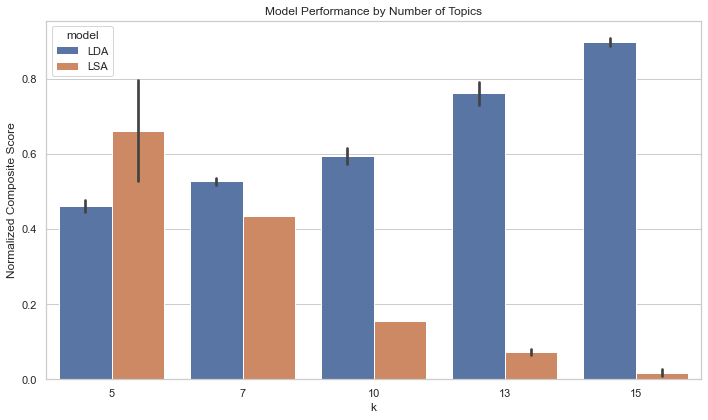

In [52]:
# Normalizing scores to [0,1] for comparison
for col in ['coherence', 'perplexity', 'diversity']:
    max_val = df_results[col].max()
    min_val = df_results[col].min()
    df_results[f'{col}_norm'] = (df_results[col] - min_val) / (max_val - min_val)

df_results['final_score'] = df_results[['coherence_norm', 'perplexity_norm', 'diversity_norm']].mean(axis=1)

# Best model
best = df_results.sort_values(by='final_score', ascending=False).iloc[0]
print("Best Model Configuration:")
print(best)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(data=df_results, x='k', y='final_score', hue='model')
plt.title("Model Performance by Number of Topics")
plt.ylabel("Normalized Composite Score")
plt.tight_layout()
plt.savefig("model_comparison_plot.png", dpi=300)
plt.show()

<h4>6.2. Metric comparison (Coherence, Perplexity and Topic Diversity)

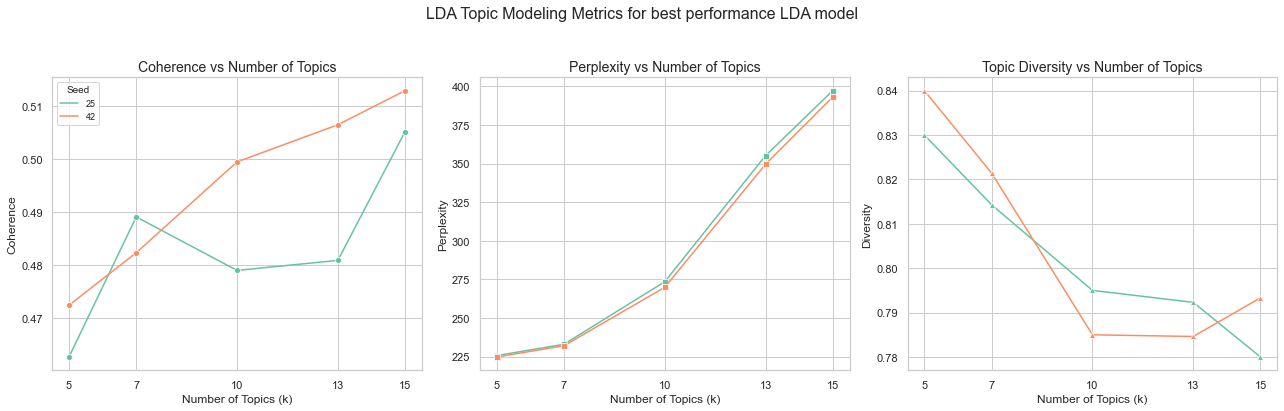

In [62]:
lda_results = df_results[df_results['model'] == 'LDA']

sns.set(style="whitegrid")
visible_palette = sns.color_palette("Set2", n_colors=10)
seeds = sorted(lda_results['seed'].unique())
seed_palette = {seed: visible_palette[i % len(visible_palette)] for i, seed in enumerate(seeds)}

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True)

# Coherence vs Number of Topics
sns.lineplot(
    data=lda_results,
    x='k', y='coherence', hue='seed', palette=seed_palette,
    marker='o', ax=axes[0], ci=None
)
axes[0].set_title("Coherence vs Number of Topics", fontsize=14)
axes[0].set_xlabel("Number of Topics (k)", fontsize=12)
axes[0].set_ylabel("Coherence", fontsize=12)
axes[0].set_xticks([5, 7, 10, 13, 15])
axes[0].legend(title="Seed", fontsize=9, title_fontsize=10)

# Perplexity vs Number of Topics
sns.lineplot(
    data=lda_results,
    x='k', y='perplexity', hue='seed', palette=seed_palette,
    marker='s', ax=axes[1], legend=False, ci=None
)
axes[1].set_title("Perplexity vs Number of Topics", fontsize=14)
axes[1].set_xlabel("Number of Topics (k)", fontsize=12)
axes[1].set_ylabel("Perplexity", fontsize=12)
axes[1].set_xticks([5, 7, 10, 13, 15])

# Diversity Plot vs Number of Topics
sns.lineplot(
    data=lda_results,
    x='k', y='diversity', hue='seed', palette=seed_palette,
    marker='^', ax=axes[2], legend=False, ci=None
)
axes[2].set_title("Topic Diversity vs Number of Topics", fontsize=14)
axes[2].set_xlabel("Number of Topics (k)", fontsize=12)
axes[2].set_ylabel("Diversity", fontsize=12)
axes[2].set_xticks([5, 7, 10, 13, 15])

plt.suptitle("LDA Topic Modeling Metrics for best performance LDA model", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("lda_metrics_comparison.png", dpi=300)
plt.show()

---

<h4>6.3. Best model

In [71]:
tqdm.pandas()

# STEP 1: Prepare dictionary and corpus from tokenized texts
texts = df_wos_scopus['Processed_text']
dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5)
corpus = [dictionary.doc2bow(text) for text in texts]

# STEP 2: Training LDA model with the best parameters from previous step
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=15,
    alpha='symmetric',
    eta='symmetric',
    random_state=42,
    passes=10,
    iterations=100,
    eval_every=None
)

# STEP 3: Assigning dominant topic to each document
def get_dominant_topic(bow):
    topic_dist = lda_model.get_document_topics(bow)
    if topic_dist:
        return max(topic_dist, key=lambda x: x[1])  # (topic_id, probability)
    else:
        return (-1, 0)

dominant_info = [get_dominant_topic(bow) for bow in tqdm(corpus)]
df_wos_scopus['Dominant_Topic'] = [topic for topic, prob in dominant_info]
df_wos_scopus['Topic_Probability'] = [prob for topic, prob in dominant_info]

# STEP 4: Export top keywords per topic
topic_keywords = []
for i in range(15):
    words = lda_model.show_topic(i, topn=15)
    topic_keywords.append({'Topic': i, 'Top_Keywords': [w for w, _ in words]})
df_topics = pd.DataFrame(topic_keywords)

df_wos_scopus.to_csv("documents_with_topics.csv", index=False)
df_topics.to_csv("lda_topic_keywords.csv", index=False)
lda_model.save("best_lda_model.gensim")
dictionary.save("lda_dictionary.gensim")
corpora.MmCorpus.serialize("lda_corpus.mm", corpus)

C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)

 47%|██████████████████████████████████▉                                       | 13462/28469 [00:13<00:14, 1017.12it/s]


 94%|██████████████████████████████████████████████████████████████████████▌    | 26779/28469 [00:28<00:01, 972.36it/s]


100%|███████████████████████████████████████████████████████████████████████████| 28469/28469 [00:29<00:00, 952.39it/s]


<h4>6.4. Tentative titles based on topic keywords

In [72]:
# Defining a function to map dominant topic to a tentativa dominant topic name
def map_topic_name(dominant_topic):
    topic_map = {
        0: 'Data Systems & Technology Use',
        1: 'Patient Care & Treatment Outcomes',
        2: 'COVID-19 & Public Health Emergencies',
        3: 'Post-Disaster Recovery',
        4: 'Humanitarian Research & Crisis Management',
        5: 'Healthcare Services in Emergencies',
        6: 'Hurricane Response & Community Recovery',
        7: 'Refugees, Conflict & Human Rights',
        8: 'Urban Resilience & Infrastructure',
        9: 'Risk Perception & Social Behavior',
        10: 'Mental Health & Trauma',
        11: 'Relief Logistics & Supply Chain Models',
        12: 'Climate Change & Environmental Impacts',
        13: 'Floods, Landslides & Environmental Hazards',
        14: 'Supply Chain & Economic Disruptions'
    }
    return topic_map.get(dominant_topic, None)

C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [73]:
df_wos_scopus['Topic_Name'] = df_wos_scopus['Dominant_Topic'].apply(map_topic_name)

C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [74]:
df_wos_scopus.head(3)

C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,DOI,Article_Title,Abstract,Author_Keywords,Author_Full_Names,Source_Title,Publication_Year,DB,Input,Title_Length,Abstract_Length,Num_Authors,Num_Keywords,Input_Length,Cleaned_text,Processed_text,bow,Dominant_Topic,Topic_Probability,Topic_Name
0,10.1111/j.1745-493X.2012.03267.x,Humanitarian and Disaster Relief Supply Chains...,With an increasing number of disasters disrupt...,humanitarian; disaster; relief planning; respo...,"Day, Jamison M.; Melnyk, Steven A.; Larson, Pa...",JOURNAL OF SUPPLY CHAIN MANAGEMENT,2012,Web of Science,Humanitarian and Disaster Relief Supply Chains...,12,160,5,7,181,humanitarian disaster relief supply chains mat...,"[humanitarian, disaster, relief, supply, chain...","[(0, 1), (1, 1), (2, 1), (3, 1), (4, 3), (5, 1...",4,0.490858,Humanitarian Research & Crisis Management
1,10.1111/j.0000-0000.2012.01047.x,Disaster-Relief Logistics With Limited Fuel Su...,Disaster-relief logistics consists of providin...,disaster-relief logistics; vehicle routing; fu...,"Suzuki, Yoshinori",JOURNAL OF BUSINESS LOGISTICS,2012,Web of Science,Disaster-Relief Logistics With Limited Fuel Su...,6,127,1,5,141,disaster relief logistics with limited fuel su...,"[disaster, relief, logistics, limited, fuel, s...","[(21, 1), (30, 1), (43, 1), (46, 4), (63, 4), ...",11,0.529414,Relief Logistics & Supply Chain Models
2,10.1016/j.ijdrr.2017.10.005,Integrated blood supply chain planning for dis...,This paper proposes a multi-objective mixed in...,Blood supply chain; Disaster relief; Multi-obj...,"Samani, Mohammad Reza Ghatreh; Torabi, S. Ali;...",INTERNATIONAL JOURNAL OF DISASTER RISK REDUCTION,2018,Web of Science,Integrated blood supply chain planning for dis...,8,171,3,5,191,integrated blood supply chain planning disaste...,"[integrated, blood, supply, chain, planning, d...","[(10, 4), (16, 1), (22, 3), (35, 1), (42, 1), ...",11,0.789835,Relief Logistics & Supply Chain Models


In [75]:
df_wos_scopus.to_csv('final_dataset.csv',index=False)

C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [76]:
df_wos_scopus.columns

C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['DOI', 'Article_Title', 'Abstract', 'Author_Keywords',
       'Author_Full_Names', 'Source_Title', 'Publication_Year', 'DB', 'Input',
       'Title_Length', 'Abstract_Length', 'Num_Authors', 'Num_Keywords',
       'Input_Length', 'Cleaned_text', 'Processed_text', 'bow',
       'Dominant_Topic', 'Topic_Probability', 'Topic_Name'],
      dtype='object')

---

<h3> 7. Time evaluation with Mann-Kendall test

In [83]:
import pymannkendall as mk

C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [85]:
# Step 1: Count documents per topic per year
topic_year_counts = df_wos_scopus.groupby(['Publication_Year', 'Topic_Name']).size().unstack(fill_value=0)

# Step 2: Apply Mann-Kendall test per topic
trend_results = []

for topic in topic_year_counts.columns:
    yearly_counts = topic_year_counts[topic]
    result = mk.original_test(yearly_counts)
    
    trend_results.append({
        'Topic_Name': topic,
        'Trend': result.trend,
        'P-Value': result.p,
        'Tau': result.Tau
        # Removed 'S' and 'Variance' which may not exist
    })

df_trends = pd.DataFrame(trend_results)

C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [91]:
df_trends

C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic_Name,Trend,P-Value,Tau
0,Climate Risk & Environmental Adaptation,increasing,2.293499e-12,0.888172
1,Data Systems & Technology Use,increasing,9.224843e-12,0.860215
2,Healthcare Services in Emergencies,increasing,1.023404e-12,0.903226
3,Humanitarian Research & Crisis Management,increasing,1.978417e-13,0.931183
4,Mental Health & Trauma,increasing,4.471978e-13,0.918280
5,Patient Care & Treatment Outcomes,increasing,6.163070e-12,0.870968
6,Relief Logistics & Supply Chain Models,increasing,2.604561e-11,0.932308
7,Hurricane Response & Community Recovery,increasing,1.679101e-12,0.910345
8,"Refugees, Conflict & Human Rights",increasing,1.348521e-11,0.907407
9,Risk Perception & Social Behavior,increasing,1.276534e-12,0.914943


In [87]:
df_trends.to_excel('trends.xlsx',index=True)

C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [92]:
# Total number of papers published per year (across all topics)
total_per_year = df_wos_scopus.groupby('Publication_Year').size().rename("Total_Papers")

# Count how many papers per topic per year
topic_counts = df_wos_scopus.groupby(['Publication_Year', 'Topic_Name']).size().reset_index(name='Count')

# Merge total per year into topic_counts
topic_counts = topic_counts.merge(total_per_year, on='Publication_Year')

# Compute proportion
topic_counts['Proportion'] = topic_counts['Count'] / topic_counts['Total_Papers']

trend_results_prop = []

for topic in topic_counts['Topic_Name'].unique():
    data = topic_counts[topic_counts['Topic_Name'] == topic].sort_values('Publication_Year')
    proportions = data['Proportion'].values
    years = data['Publication_Year'].values

    # Fill in 0s for missing years if needed
    full_years = pd.Series(index=range(min(years), max(years)+1), dtype=float)
    full_years[data['Publication_Year'].values] = proportions
    full_years = full_years.fillna(0)

    # Run Mann-Kendall on proportions
    result = mk.original_test(full_years.values)
    
    trend_results_prop.append({
        'Topic_Name': topic,
        'Trend': result.trend,
        'P-Value': result.p,
        'Tau': result.Tau
    })

df_trends_prop = pd.DataFrame(trend_results_prop).sort_values(by='Tau', ascending=False)
df_trends_prop

C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic_Name,Trend,P-Value,Tau
13,Urban Resilience & Infrastructure,increasing,1.355730e-06,0.676923
6,Relief Logistics & Supply Chain Models,increasing,3.830994e-07,0.643011
9,Risk Perception & Social Behavior,increasing,9.663202e-06,0.572414
14,"Floods, Landslides & Environmental Hazards",increasing,4.714045e-03,0.406667
3,Humanitarian Research & Crisis Management,increasing,4.298292e-03,0.363441
11,Supply Chain Disruptions & Economic Impact,increasing,3.726236e-02,0.275862
0,Climate Risk & Environmental Adaptation,no trend,5.474777e-02,0.245161
10,COVID-19 & Public Health Emergencies,no trend,1.189258e-01,0.206897
12,Earthquake & Post-Disaster Recovery,no trend,5.931129e-01,0.074074
7,Hurricane Response & Community Recovery,no trend,6.427432e-01,-0.062069


C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


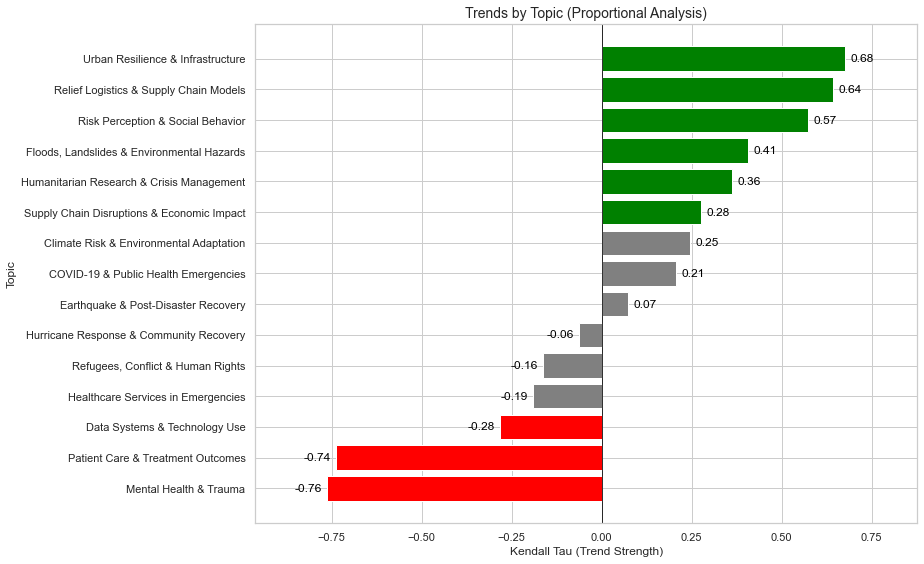

In [97]:
def trend_color(trend):
    if trend == 'increasing':
        return 'green'
    elif trend == 'decreasing':
        return 'red'
    else:
        return 'gray'

df_trends_prop['Color'] = df_trends_prop['Trend'].apply(trend_color)

# Sort by Tau
df_trends_prop = df_trends_prop.sort_values(by='Tau')

plt.figure(figsize=(13, 8))
sns.set(style="whitegrid")

bars = plt.barh(
    df_trends_prop['Topic_Name'],
    df_trends_prop['Tau'],
    color=df_trends_prop['Color']
)

for i, (value, topic) in enumerate(zip(df_trends_prop['Tau'], df_trends_prop['Topic_Name'])):
    if value > 0:
        plt.text(value + 0.015, i, f"{value:.2f}", va='center', ha='left', color='black')
    else:
        plt.text(value - 0.015, i, f"{value:.2f}", va='center', ha='right', color='black')

plt.title('Trends by Topic (Proportional Analysis)', fontsize=14)
plt.xlabel('Kendall Tau (Trend Strength)')
plt.ylabel('Topic')
plt.axvline(0, color='black', linewidth=0.8)
plt.xlim(df_trends_prop['Tau'].min() - 0.2, df_trends_prop['Tau'].max() + 0.2)
plt.tight_layout()
plt.savefig("trends_by_topic.png", dpi=300)
plt.show()

<h3>8. Topic Visualization

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [126]:
import textwrap

# Wrap labels at word boundaries with a max line width (~30 characters)
df_wos_scopus['Topic_Label_Wrapped'] = df_wos_scopus['Topic_Name'].apply(
    lambda x: '\n'.join(textwrap.wrap(x, width=30))
)

C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 4.1. Total Publications per Topic

C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


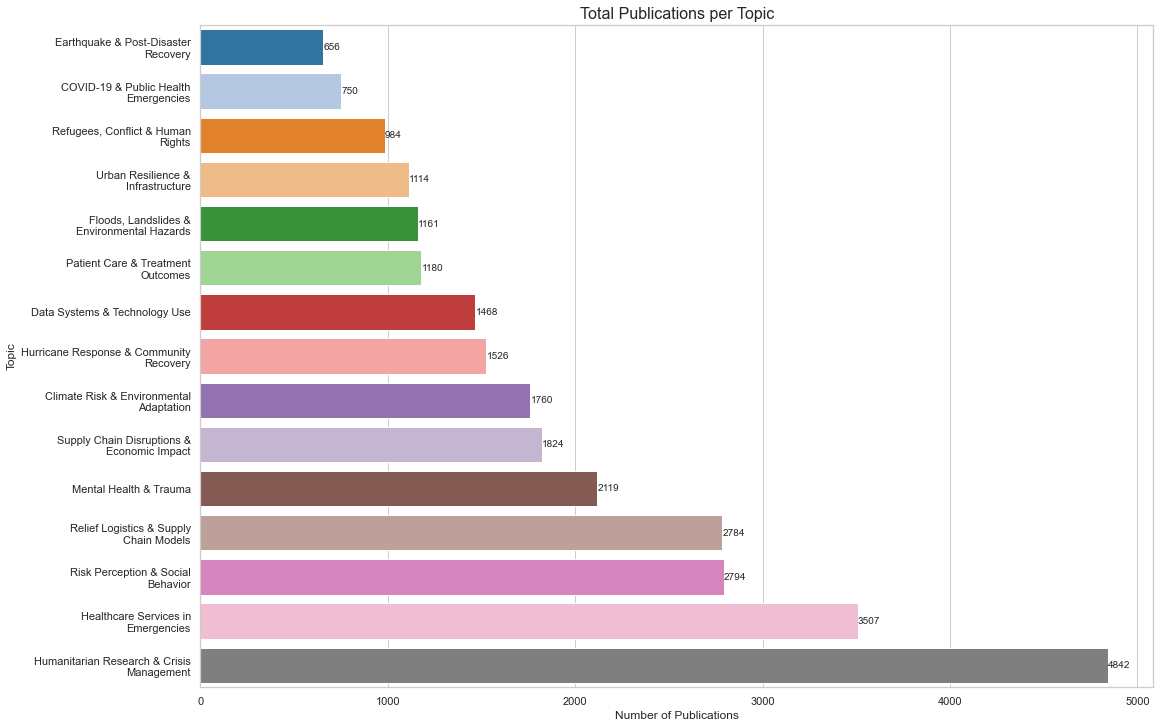

In [128]:
# Count values with cleaned labels
topic_counts = df_wos_scopus['Topic_Label_Wrapped'].value_counts().sort_values()

# Plot
fig, ax = plt.subplots(figsize=(16, 10), constrained_layout=True)

sns.barplot(x=topic_counts.values, y=topic_counts.index, palette='tab20', ax=ax)

# Add count labels
for i, (count, label) in enumerate(zip(topic_counts.values, topic_counts.index)):
    ax.text(count + 1, i, str(count), va='center', fontsize=10)

# Titles and labels
ax.set_title("Total Publications per Topic", fontsize=16)
ax.set_xlabel("Number of Publications", fontsize=12)
ax.set_ylabel("Topic", fontsize=12)
plt.savefig("publications_per_topic.png", dpi=300)
plt.show()

### 4.2. Publications by Topic Distribution

C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


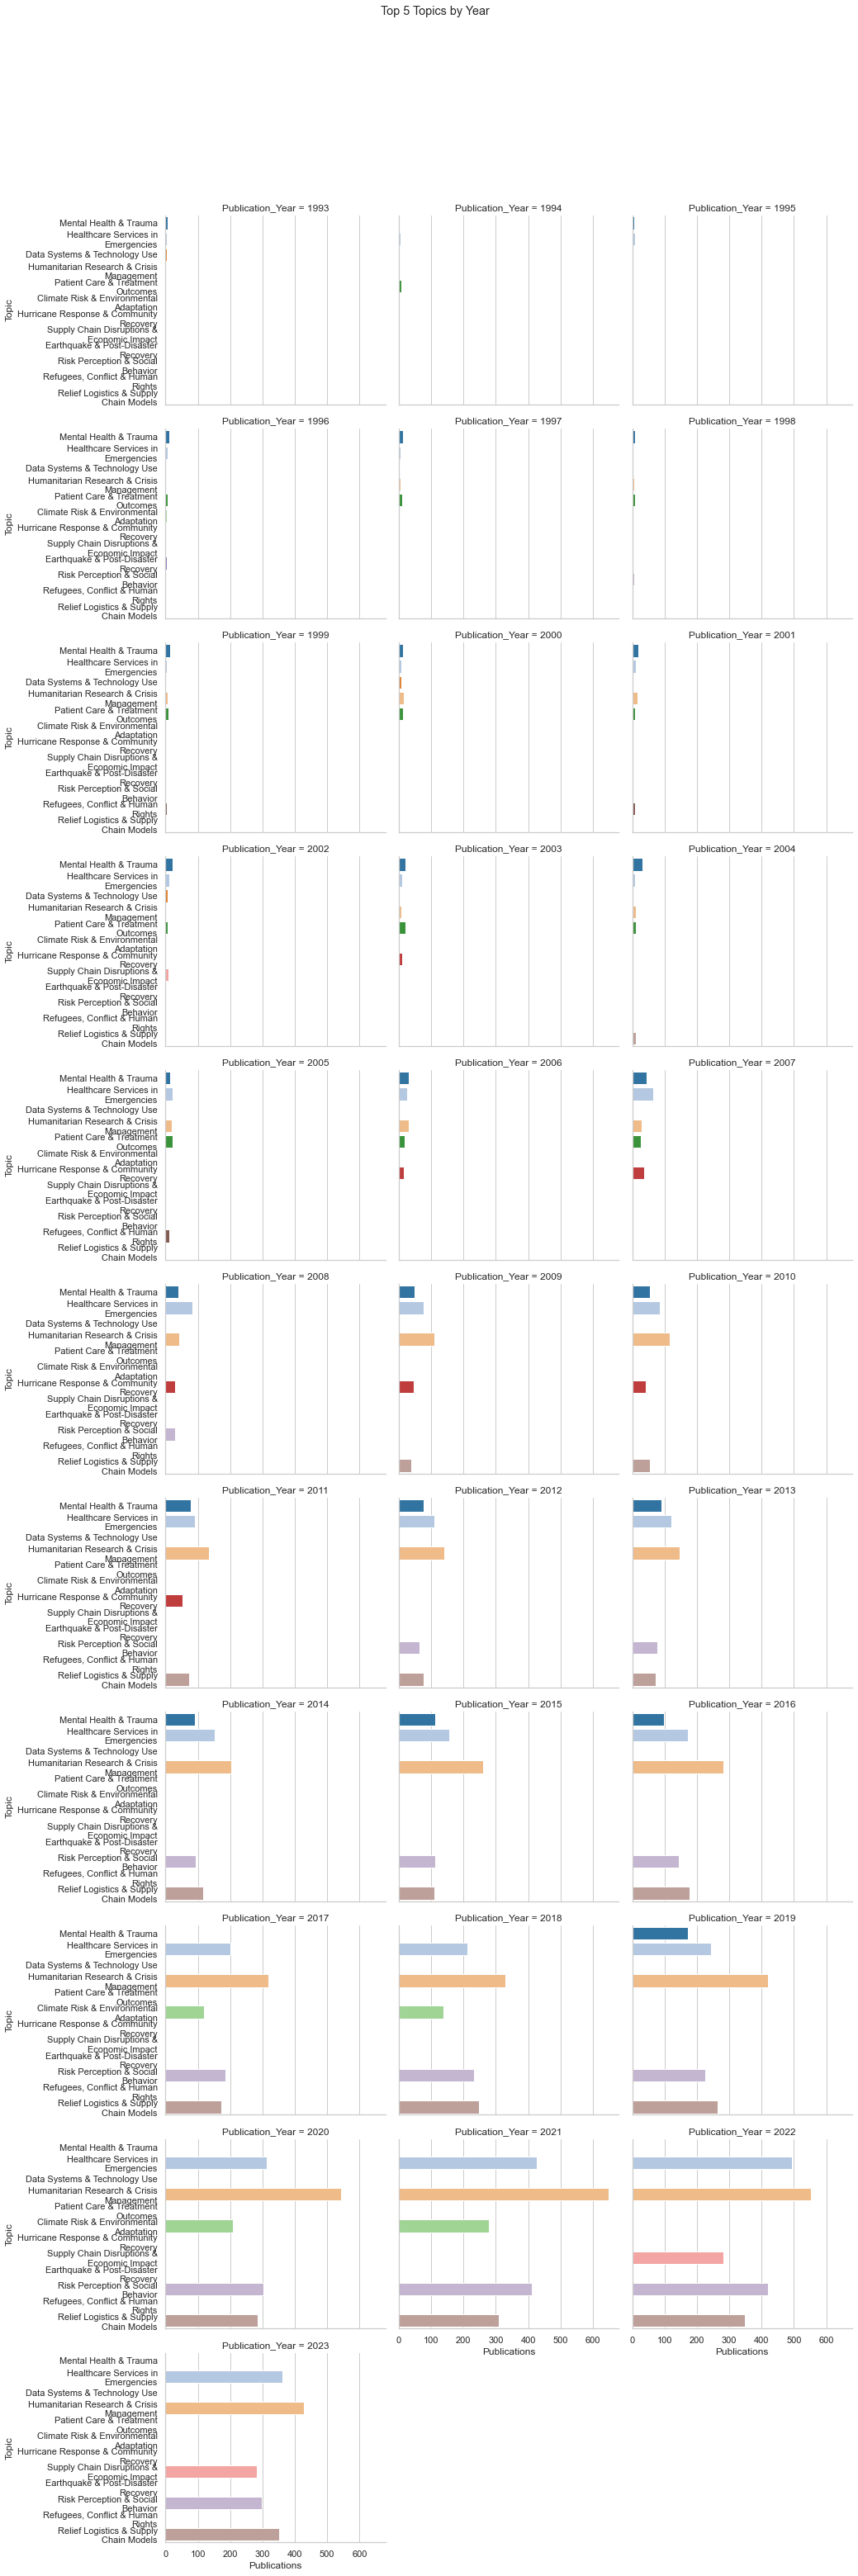

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count publications per topic per year
year_topic_counts = df_wos_scopus.groupby(['Publication_Year', 'Topic_Label_Wrapped'])['DOI'].count().reset_index()

# Get top 5 topics per year
top_per_year = year_topic_counts.groupby('Publication_Year').apply(
    lambda g: g.nlargest(5, 'DOI')
).reset_index(drop=True)

# Plot
g = sns.catplot(
    data=top_per_year,
    x='DOI',
    y='Topic_Label_Wrapped',
    col='Publication_Year',
    col_wrap=3,
    kind='bar',
    height=4,
    aspect=1.2,
    palette='tab20'
)

g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Top 5 Topics by Year")
g.set_axis_labels("Publications", "Topic")
plt.show()

### 4.3. Total Publications Per Topic

C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


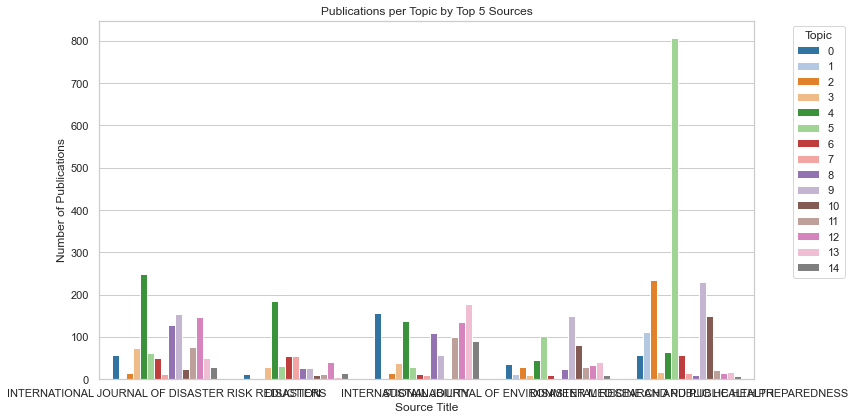

In [111]:
# Get Top 5 sources
top_sources = df_wos_scopus['Source_Title'].value_counts().nlargest(5).index
df_top_sources = df_wos_scopus[df_wos_scopus['Source_Title'].isin(top_sources)]

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_sources, x='Source_Title', hue='Dominant_Topic', palette='tab20')
plt.title("Publications per Topic by Top 5 Sources")
plt.xlabel("Source Title")
plt.ylabel("Number of Publications")
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 4.4. Publications Per Topic by Source

In [33]:
# Create a mapping for the source titles to shorten with line breaks
def format_source_title(title):
    if title == 'Disaster Medicine And Public Health Preparedness':
        return 'Disaster Medicine\nand Public Health\nPreparedness'
    elif title == 'Disasters':
        return 'Disasters'
    elif title == 'International Journal Of Disaster Risk Reduction':
        return 'Int. Journal of\nDisaster Risk\nReduction'
    elif title == 'International Journal Of Environmental Research And Public Health':
        return 'Int. Journal of\nEnvironmental Research\nand Public Health'
    elif title == 'Sustainability':
        return 'Sustainability'
    else:
        return title

# Apply the formatting function to the Source_Title column
filtered_publications['Source_Title'] = filtered_publications['Source_Title'].apply(format_source_title)

<ipython-input-33-b8d241afe4c3>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_publications['Source_Title'] = filtered_publications['Source_Title'].apply(format_source_title)


C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


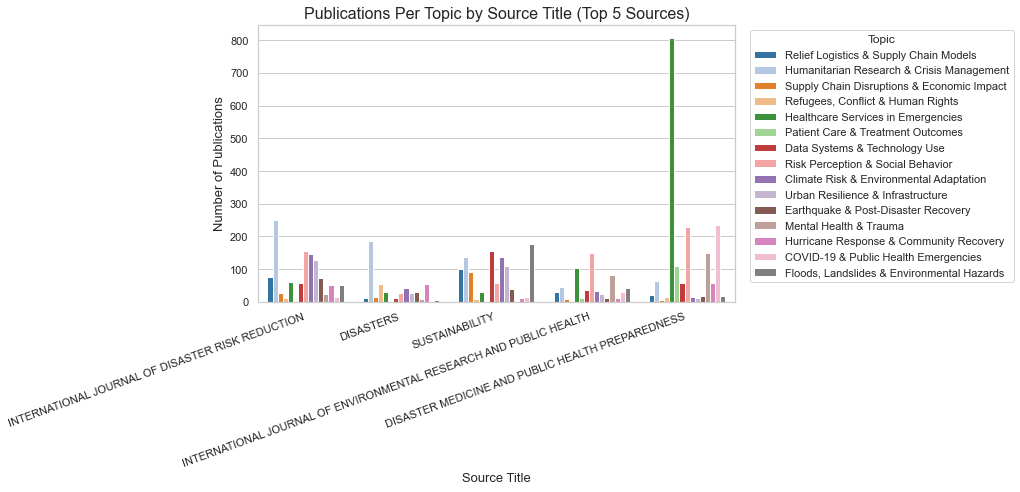

In [100]:
# Group to get the top 5 most frequent source titles
top_sources = df_wos_scopus['Source_Title'].value_counts().nlargest(5).index

# Filter the DataFrame
df_top_sources = df_wos_scopus[df_wos_scopus['Source_Title'].isin(top_sources)]

# Set style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("tab20", n_colors=df_top_sources['Topic_Name'].nunique())

# Create the bar plot
plt.figure(figsize=(14, 7))
sns.countplot(
    data=df_top_sources,
    x='Source_Title',
    hue='Topic_Name',
    palette=palette
)

# Titles and labels
plt.title('Publications Per Topic by Source Title (Top 5 Sources)', fontsize=16)
plt.xlabel('Source Title', fontsize=13)
plt.ylabel('Number of Publications', fontsize=13)

# Rotate x-axis labels if needed
plt.xticks(rotation=20, ha='right')

# Legend outside
plt.legend(title='Topic', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()

### 4.5. Heatmap of Publications per Topic and Year

C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


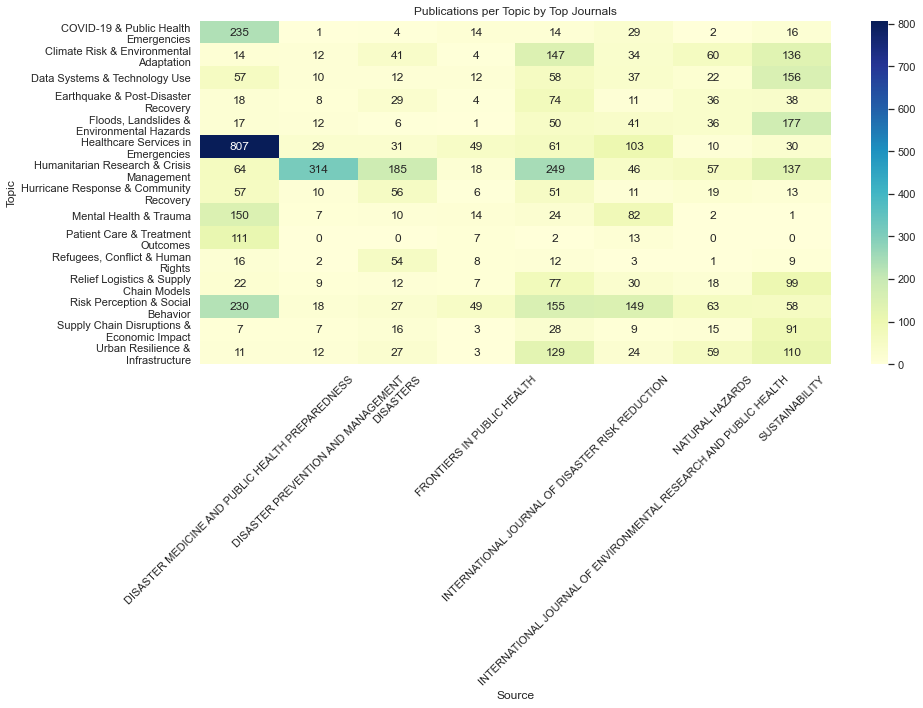

In [130]:
# Top N sources
top_sources = df_wos_scopus['Source_Title'].value_counts().nlargest(8).index
df_top_sources = df_wos_scopus[df_wos_scopus['Source_Title'].isin(top_sources)]

# Pivot
journal_topic = df_top_sources.pivot_table(
    index='Topic_Label_Wrapped',
    columns='Source_Title',
    values='DOI',
    aggfunc='count',
    fill_value=0
)

plt.figure(figsize=(14, 10))
sns.heatmap(journal_topic, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Publications per Topic by Top Journals")
plt.xlabel("Source")
plt.ylabel("Topic")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


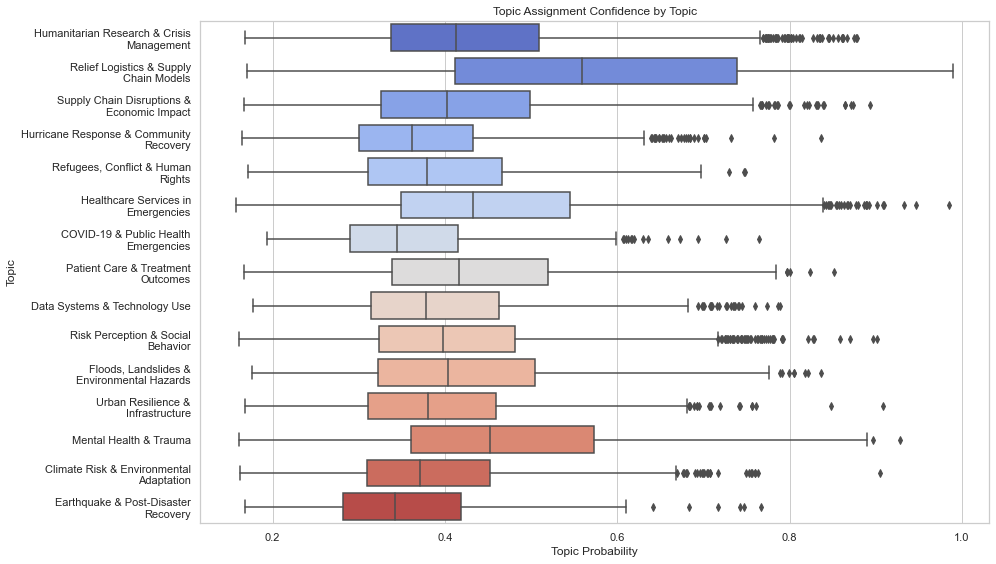

In [131]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_wos_scopus, x='Topic_Probability', y='Topic_Label_Wrapped', palette='coolwarm')
plt.title("Topic Assignment Confidence by Topic")
plt.xlabel("Topic Probability")
plt.ylabel("Topic")
plt.tight_layout()
plt.show()


### 4.6. Top Sources per Topic

In [42]:
topics = [
    'Community Resilience and Management',
    'Healthcare in Emergency Situations',
    'Risk Management Systems',
    'Mental Health Risks During Disasters'
]

# Format to title 
def format_source_title(title):
    return title.title()

top_sources_by_topic = []

for topic in topics:
    filtered_data = df_wos_scopus[df_wos_scopus['dominant_topic_name'] == topic]
    
    source_counts = filtered_data['Source_Title'].value_counts().reset_index()
    source_counts.columns = ['Source_Title', 'Counts']
    
    source_counts['Source_Title'] = source_counts['Source_Title'].apply(format_source_title)
    
    # Get the top 5 sources for the topic
    top_sources = source_counts.head(5)
    top_sources['Dominant_Topic'] = topic
    top_sources_by_topic.append(top_sources)

# Combine results into a single DataFrame
result_df = pd.concat(top_sources_by_topic, ignore_index=True)
result_df

<ipython-input-42-746c84b96d04>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_sources['Dominant_Topic'] = topic


,Source_Title,Counts,Dominant_Topic
0,International Journal Of Disaster Risk Reduction,611,Community Resilience and Management
1,Disasters,423,Community Resilience and Management
2,Disaster Prevention And Management,351,Community Resilience and Management
3,Sustainability,348,Community Resilience and Management
4,Disaster Medicine And Public Health Preparedness,266,Community Resilience and Management
5,Disaster Medicine And Public Health Preparedness,1099,Healthcare in Emergency Situations
6,Journal Of Pain And Symptom Management,151,Healthcare in Emergency Situations
7,International Journal Of Environmental Researc...,111,Healthcare in Emergency Situations
8,Disaster Medicine And Public Health Preparedness,78,Healthcare in Emergency Situations
9,Frontiers In Public Health,70,Healthcare in Emergency Situations


In [43]:
result_df.to_excel('sources_per_topic.xlsx')

### 4.7. COVID check

C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


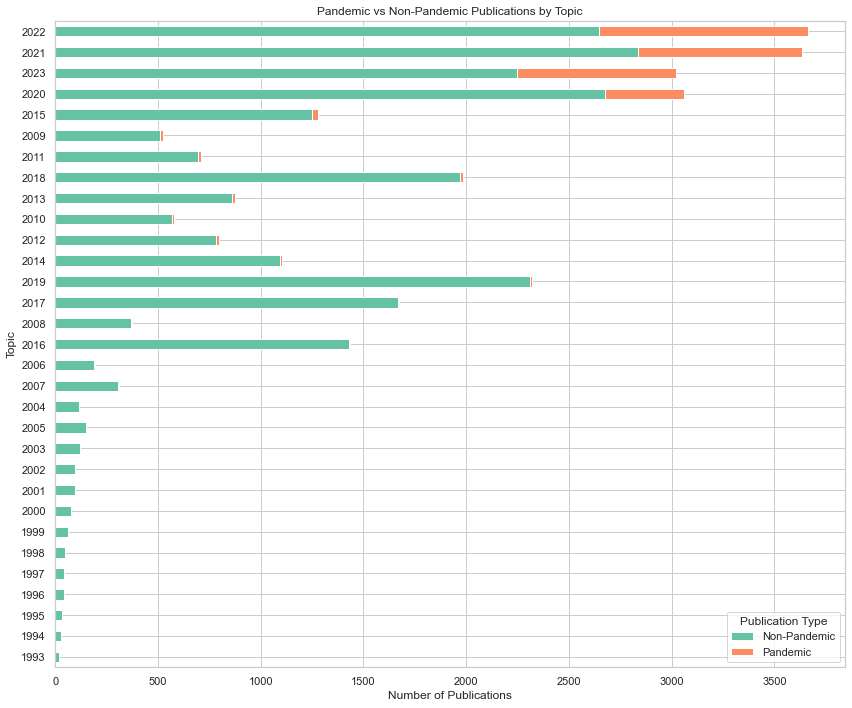

In [135]:
# Create binary column for pandemic-related
keywords_pattern = r'(?i)\b(pandemi\w*|covid|coronavirus)\b'
df_wos_scopus['Pandemic_Related'] = df_wos_scopus['Input'].str.contains(keywords_pattern, regex=True)

# Group counts
pandemic_topic = df_wos_scopus.groupby(['Publication_Year', 'Pandemic_Related'])['DOI'].count().unstack().fillna(0)
pandemic_topic.columns = ['Non-Pandemic', 'Pandemic']

# Plot
colors = ['#66c2a5', '#fc8d62']  # Manually defined colors from Set2

pandemic_topic.sort_values('Pandemic').plot(
    kind='barh',
    stacked=True,
    figsize=(12, 10),
    color=colors
)

plt.title("Pandemic vs Non-Pandemic Publications by Topic")
plt.xlabel("Number of Publications")
plt.ylabel("Topic")
plt.legend(title='Publication Type', loc='lower right')
plt.tight_layout()
plt.show()